# Проект: Исследование стартапов

Автор: Лапшина Виктория

Дата: 25.04.2025

<font color='#8B0000'>Комментрарий студента: Привет! Меня зовут Вика, буду рада обратной связи.</font>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Виктория! А меня зовут Марат, и я буду твоим ревьюером.  По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>



---
    
Для лучшей коммуникации будет лучше если ты будешь оставлять ответные комментарий (cвои комментарии к исправлениям, вопросы), так результат будет лучше.  А чтобы ревьюры их не теряли, лучше их подсвечивать цветом (можешь выбрать свой, а можешь использовать   тот который я предложил ниже). И чтобы не возникло путаницы лучше оставлять указание на номер версии комментария по итерация:  

1 итерация

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат!.</div>


2 итерация

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>
    
    
И лучше подсвечивать свои комментарии цветом, для этого достаточно в ячейку markdown добавить: 

```html
<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>    

```    
    
Хорошая коммуникация залог успеха! )
    
---

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

Чтобы ваше исследование шло оптимальным путём, рекомендуем чётко следовать предложенным дальше шагам. Углублённая предобработка и исследование неприоритетных для проекта вопросов может потребовать много дополнительного времени.

В процессе работы старайтесь записывать свои рассуждения — это полезная привычка во время обучения. Пользуйтесь общими правилами:

- начните с введения, в котором опишите контекст и цели проекта в целом;
- записывайте в комментариях к коду всё, что относится к нему или алгоритму;
- основания совершаемых в проекте действий и выводы, которые касаются предмета исследования, — записывайте в ячейках типа Markdown;
- после каждого крупного раздела — шага проекта — обязательно формулируйте промежуточные выводы.

------------

### Цели и задачи проекта

Цель проекта: Подготовить датасет и провести исследовательский анализ данных финансовой компании о стартапах с целью выявления показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.

Задачи:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - изучить данные более детально
   - изучить взаимосвязь данных о категории стартапов и количества раундов финансирования перед его покупкой
   - выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании
4. Сформулировать выводы по проведенному анализу.

### Содержимое проекта:
1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

------

In [1]:
#!pip install phik -U

In [2]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)

In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
#from phik import phik_matrix

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 В этом проекте мы не используем phik_matrix, поэтому стоит сэкономить ресурсы и не подгружать эту стороннюю библиотеку

In [4]:
# Выгружаем данные v1 исправлено
PATH = "https://code.s3.yandex.net/datasets/"
acq_df = pd.read_csv(PATH + 'acquisition.csv')
comp_df = pd.read_csv(PATH + 'company_and_rounds.csv')
ppl_df = pd.read_csv(PATH + 'people.csv')
edu_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund_df = pd.read_csv(PATH + 'fund.csv')
invest_df = pd.read_csv(PATH + 'investment.csv')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

 
- Можно заметить что у нас везде повторяется данный путь https://code.s3.yandex.net/datasets/ , его можно оформить как константу
    
        PATH = "https://code.s3.yandex.net/datasets/"
        acquisition = pd.read_csv(PATH + 'acquisition.csv')
        ....

Так будет и более читабельно, и  будет проще подправить, если изменится url    
    
  

In [5]:
# Выводим информацию о датасете acquisition
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [6]:
# Выводим первые строки acquisition
acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет acquisition.csv содержит информацию о покупках одними компаниями других компаний и состоит из 9407 строк и 6 столбцов:
- 4 столбца с типом данных `int64`, которые содержат числовые данные
- 2 столбца с типом данных `object` со строковыи данными. Столбец `acquired_at` хранит информацию о дате сделки - этот столбец лучше преобразовать к типу данных `datetime64`

In [7]:
# Выводим информацию о датасете company_and_rounds
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [8]:
# Выводим первые строки company_and_rounds
comp_df.head(10)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет company_and_rounds.csv содержит информацию о компаниях и раундах финансирования и состоит из 21774 строк и 22 столбцов:
- 12 столбцов с типом данных `float64`, которые содержат числовые данные
- 10 столбцов с типом данных `object` со строковыи данными. Столбцы `founded_at`, `closed at` и `funded  at` хранят информацию с датами - эти столбцы лучше преобразовать к типу данных `datetime64`

<font color='#8B0000'>v1 Скорректированный комментарий</font>
Также названия столбцов необходимо привести к snake_case для удобства при дальнейшем анализе. Также можно заметить, что в датасете есть два столбца с идентификатором компании - это столбцы с индентификаторами покупающих и покупаемых компаний, их необходимо прерименовать для простоты понимания.

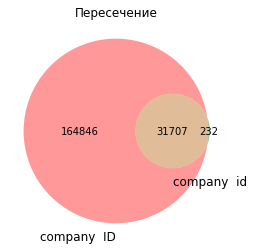

In [9]:
#v1 Спасибо за интересную информацию, не слышала еще о таком графике
# Отображаем совпадение данных в столбцах с идентификаторами
first_id = set(comp_df['company  ID'].dropna().unique())
second_id = set(comp_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение")
plt.show() 

In [10]:
# Выводим информацию о датасете people
ppl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [11]:
# Выводим первые строки people
ppl_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет people.csv содержит информацию о сотрудниках и состоит из 226709 строк и 5 столбцов:
- 1 столбец с типом данных `float64` с числовыми данными
- 1 столбец с типом данных `int64`, которые содержат числовые данные
- 3 столбца с типом данных `object` со строковыи данными

In [12]:
# Выводим информацию о датасете education
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [13]:
# Выводим первые строки education
edu_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет education.csv содержит информацию об образовании сотрудника и состоит из 109610 строк и 4 столбцов:
- 2 столбца с типом данных int64, которые содержат числовые данные
- 2 столбца с типом данных object со строковыи данными. Столбец `graduated_at` содержит информацию о дате получения образования, его можно преобразовать к типу данных `datetime64`

<font color='#8B0000'>v1 Новый комментарий</font> Также можно заметиь ошибку в столбце `instituition`, который соджерждит информацию об учебном заведении - корректно будет переимновать столбец в `institution`

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно. 


Вижу что что воспользовалось многими жёлтыми советами 

In [14]:
# Выводим информацию о датасете degrees
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [15]:
# Выводим первые строки degrees
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет degrees.csv содержит информацию о типе образования сотрудника и состоит из 109610 строк и 4 столбцов:
- 1 столбец с типом данных int64, которые содержат числовые данные
- 3 столбца с типом данных object со строковыи данными


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Предварительный обзор данных сделан


- Выводы сделаны


- План дальнейших действий составлен
 


     
<div class="alert alert-warning">

Совет 🤔:
 

- Можно было найти опечатку 


- Можно было дополнительно сконцентрировать внимание на     company  ID и company  id. Почему такие одинаковые названия, что за этим стоит? Сделать проверку насколько они совпадают. Можно красиво это увидеть с помощью (схема) 


	first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
	second_id = set(company_and_rounds_df['company  id'].dropna().unique())
	# Строим диаграмму Венна
	venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

	# Отображаем график
	plt.title("Пересечение ")
	plt.show() 
	
	 

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

---------

In [16]:
# Приводим столбцы company_and_rounds к snake_case и меняем названия столбцов
comp_df = comp_df.rename(columns={'company  ID': 'acquiring_company_id', 'company  id': 'acquired_company_id'})
comp_df.columns = comp_df.columns.str.lower().str.replace('  ', '_')

In [17]:
# v1 новое
# Переименуем столбец instituition
edu_df = edu_df.rename(columns={'instituition': 'institution'})

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



А здорово что использовала автоматизированный подход, и не допустила два одинаковых названия столбца


 

In [18]:
# Преобразуем тип данных столбцов с датами к типу datetime64
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'])
comp_df['closed_at'] = pd.to_datetime(comp_df['closed_at'])
comp_df['funded_at'] = pd.to_datetime(comp_df['funded_at'])
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'])


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 
    
<div class="alert alert-warning">



Совет 🤔:


 
    
- Ещё можно было хитро автоматизировать приведение к нужному типу,  заметив что все столбцы которые нужно привести к типу datetime содержат "_at". Реализовать это можно по-разному, например использовать функцию в функций. Одна функция - это двойной цикл (Пробегается по всем датсетам а в каждом датасете по всем столбцам),  а в качестве аргумента в ней подаём другую функцию, которая в отношении столбца делает нужную операцию (Одна функция приводит к верному типу данных, другая работает со стилистикой название столбцов итп). Если не очень знакома тема функций, то ниже написал шаблончик можешь поиграться, добавив к   process_to_datetime, какие-то другие функции, которые ты хочешь применить к каждому столбцу какждого датасета - например поискать столбец в котроом содержится network_username (У нас есть такое задание)
	
	


		# код ревьюера


		# Пример функции для обработки столбца
		def process_to_datetime(column):
			"""
			Функция, которая выполняет действия над столбцом.
			Например, преобразует столбцы с '_at' в datetime.
			"""
			if '_at' in column.name:  # Проверяем, содержит ли название столбца '_at'
				return pd.to_datetime(column)  # Преобразуем в datetime
			return column  # Возвращаем столбец без изменений

		# Основная функция для обработки датасетов
		def process_datasets(dataset_dict, column_processor):
			"""
			Функция, которая проходит по каждому датасету в словаре и каждому столбцу,
			применяя к ним функцию column_processor.
			"""
			for dataset_name, dataset in dataset_dict.items():  # Проходим по каждому датасету в словаре
				for column_name in dataset.columns:  # Проходим по каждому столбцу
					dataset[column_name] = column_processor(dataset[column_name])  # Применяем функцию
			return dataset_dict

		# Пример данных (создаём несколько датасетов для демонстрации)
		data1 = pd.DataFrame({
			'created_at': ['2023-01-01', '2023-02-01'],
			'updated_at': ['2023-01-02', '2023-02-02'],
			'value': [10, 20]
		})

		data2 = pd.DataFrame({
			'start_at': ['2023-03-01', '2023-04-01'],
			'end_at': ['2023-03-02', '2023-04-02'],
			'price': [100, 200]
		})

		# Словарь датасетов
		dataset_dict = {
			'dataset1': data1,
			'dataset2': data2
		}

		# Обрабатываем датасеты
		processed_datasets = process_datasets(dataset_dict, process_to_datetime)

		# Выводим результат
		for dataset_name, dataset in processed_datasets.items():
			display(f"Датасет '{dataset_name}':")
			display(dataset)
 

<font color='#8B0000'>Комментарий студента: пока что выглядит сложно, буду тестировать, спасибо!</font>

In [19]:
# Проверяем количество пропусков в каждом столбце
acq_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [20]:
# Считаем долю строк с пропусками
acq_df.isna().sum() / acq_df.shape[0] *100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

В датасете acquisition.csv пропуски содержатся в двух столбцах - `term_code` и `acquired_at`. Данные столбцы не нужны для последующего анализа, поэтоу пропуски в них можно опустить.

In [21]:
# Проверяем количество пропусков в каждом столбце
comp_df.isna().sum()

acquiring_company_id       302
name                       302
category_code            73888
status                     302
founded_at              107818
closed_at               214325
domain                   70615
network_username        122240
country_code            109167
investment_rounds          302
funding_rounds             302
funding_total              302
milestones                 302
funding_round_id        164846
acquired_company_id     164846
funded_at               165094
funding_round_type      164846
raised_amount           164846
pre_money_valuation     164846
participants            164846
is_first_round          164846
is_last_round           164846
dtype: int64

In [22]:
# Считаем долю строк с пропусками
comp_df.isna().sum() / comp_df.shape[0] * 100

acquiring_company_id     0.138676
name                     0.138676
category_code           33.928752
status                   0.138676
founded_at              49.509124
closed_at               98.416248
domain                  32.425818
network_username        56.131586
country_code            50.128574
investment_rounds        0.138676
funding_rounds           0.138676
funding_total            0.138676
milestones               0.138676
funding_round_id        75.695905
acquired_company_id     75.695905
funded_at               75.809784
funding_round_type      75.695905
raised_amount           75.695905
pre_money_valuation     75.695905
participants            75.695905
is_first_round          75.695905
is_last_round           75.695905
dtype: float64

В датасете company_and_rounds.csv пропуски содержатся во всех столбцах. Строки, которые не имеют информации о компаниях не представляют ценности для анализа, и их можно удалить.

<font color='#8B0000'>v1 Новый комментарий</font> Некоторые пропуски можно объяснить отсутствием информации о компаниях: например, в столбце `closed_at` пропуски могут указывать на то, что компания еще действующая; а в столбцах closed_at и network_username пропуски могут появиться в силу того, что у компании нет сайта.
Также довольно много пропусков есть в столбцах, содержащих информацию о раундах финансирования - информация есть только для 25% строк. Возможно данные столбцы появились в датасете позднее, и эти данные изначально были неизвестны или не зафиксированы.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(На самом деле многие пропуски возникли из-за объединения двух табличек в comp_df) 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Информация о пропусках в абсолютных и относительных значениях выведена, молодец

       
     Строки, которые не имеют информации о компаниях не представляют ценности для анализа, и их можно удалить

       
- Вообще верно замечание, но это можно было сделать только после изучения всего проекта    
    
    
<div class="alert alert-warning">
 

Совет 🤔:
    
    
     

- Я бы задержался на анализе пропусков и причин их появления. Если мы напишем причины, то это будет хорошая отправная точка чтобы в будущем не возникали такие рода проблемы при сборе информации. Кроме того   это прямая информация которая нам понадобится в последнем разделе первой части

     
    
- Можно визуализировать пропуски с помощью библиотеки [missingno](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/), выглядит красиво
    
А главное мы поймём структуру пропусков в company_and_rounds, а это важно для последнего раздела первой части. Посоветовал бы использовать  msno.matrix(),  и там бы мы увидели кластеры пропусков.   Это   мощная подсказкой для  последнего раздела первой части    
    
    
Также у missingno есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах, это может подсказать как образовались многие наши пропуски

 

In [23]:
# Проверяем количество пропусков в каждом столбце
ppl_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [24]:
# Считаем долю строк с пропусками
ppl_df.isna().sum() / ppl_df.shape[0] * 100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

В датасете people.csv пропуски содержатся во всех столбцах, кроме `id`. В столбцах `company_id` и `network_username` пропуски составляют более 80% и нет возможнолст заполнить их на основании других данных - дальнейший анализ по этим столбцам проводить будет некорректно.

In [25]:
# Проверяем количество пропусков в каждом столбце
edu_df.isna().sum()

id                  0
person_id           0
institution        55
graduated_at    51556
dtype: int64

In [26]:
# Считаем долю строк с пропусками
edu_df.isna().sum() / edu_df.shape[0]

id              0.000000
person_id       0.000000
institution     0.000502
graduated_at    0.470359
dtype: float64

В датасете education.csv пропуски содежратся в столбцах `instituition` и `graduated_at`. В столбце `instituition` процент пропусков незначителен, а в столбце `graduated_at` отсутствует примерно половина данных.

In [27]:
# Проверяем количество пропусков в каждом столбце
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [28]:
# Считаем долю строк с пропусками
degrees_df.isna().sum() / degrees_df.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

В датасете degrees.csv пропуски содежратся в столбцах `degree_type` и `subject` - 10% и 25% соответственно.

### Промежуточный вывод

Были проделаны следующие шаги:
- предоставленные датасеты были загружены, выведена информация о содержащихся данных
- в датасете company_and_rounds к единому стилю были приведены названия столбцов
- столбцы, хранящие информацию с датами были приведены к подходящему типу данных
- были проверены пропуски в столбцах: имеются столбцы, пропуски в окторых составляют довольно большой процент и проведение анализы на основании этих столбцов невозможно, в частности это столбцы в датасете company_and_rounds, а также столбцы `company_id` и `network_username` в датасете people.csv.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍За промежуточный вывод


 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

-------------------

In [29]:
# Создаем столбец с выделенным из даты годом и группируем данные !v1 mean заменено на median!
comp_df['funding_year'] = comp_df['funded_at'].dt.year
comp_df['cut_amount'] = comp_df['raised_amount']/1000000 #сокращаем данные до миллионов для простоты восприятия
grouped_df = comp_df.groupby('funding_year', as_index=False)['cut_amount'].agg(['median', 'count'])
filtered_df = grouped_df[grouped_df['count']>50]
filtered_df

,median,count
funding_year,,
1999.0,2.00000,76
2000.0,4.20000,125
2001.0,3.00000,96
2002.0,4.20000,116
2003.0,3.00000,159
2004.0,5.00000,291
2005.0,5.50000,1633
2006.0,5.00000,2436
2007.0,3.97332,3279


 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


- Нам прямо подсказывается "типичный размер средств".  А мы не получим типичное если используем среднюю которая чувствительна к выбросам.  Советую использовать медиану    
     

Text(0, 0.5, 'Размер средств, млн')

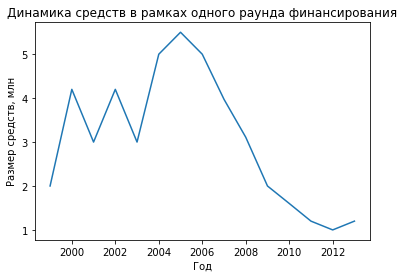

In [30]:
# Строим линейный график
filtered_df.plot(kind='line',
                 use_index=True,
                 y='median',
                title='Динамика средств в рамках одного раунда финансирования',
                legend=False)
plt.xlabel('Год')
plt.ylabel('Размер средств, млн')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Вылетает ошибка     
    
    KeyError: 'funding_year'


    
Стоит перед отправкой проекта перезапустить ядро и выполнить все ячейки – так можно проверить, что код работает:
    
<img src='https://jing.yandex-team.ru/files/aslvova/Screenshot%202022-05-31%20at%2011.08.40.png' alt='restart_kernel_and_run_all' width='400'>

Не знаю какая картинка откроется...

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)




 

<font color='#8B0000'>Комментарий студента: Я выполняла все локально и долго не могла подобрать решение. пробовала и сводную таблицу и группировку. В итоге получилось построить график через группировку с использованием as_index=False. А в итоге в среде практикума это не отработало...</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Теперь график корректный


 

Максимальный типичный размер собранных в рамках одного раунда средств был зафиксирован в 2005 году - более 5 млн. рублей.

В 2013 году было зафиксировано максимальное количество раундов за весь период - 11072, при этом типичный размер средств принимает довольно низкие значения относительно других лет.


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 
-  Оформление отличное - надписи по осям, заголовок - на месте
  
  

    
<div class="alert alert-warning">

Совет 🤔:

    
         
    
- Можно углубить анализ построив график "количество раундов". Увидеть две разнонаправленных   тенденции и связать их гипотезой   
    
    
    
- По оси Y пишем в чём измеряются цифры   	
	
	 
    
    
- Кстати тут можно добавить коэффициент дефляции,  ведь покупательная способность одного доллара в 2000 и 2013 года разная. Такой вот экономический аспектик     
    
     


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

------------

In [31]:
# Объединяем датасеты people и education v1 скорректировано
merged_edu = ppl_df.merge(edu_df, left_on='id', right_on='person_id', suffixes = ('_people','_education'), how='left')
merged_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   institution       109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [32]:
#  v1 Проверяем на дубликаты
merged_edu.duplicated(subset=['first_name', 'last_name']).sum()

55036

In [33]:
# v1 Удаляем дубликаты
merged_edu_copy = merged_edu.copy()
merged_edu_copy.drop_duplicates(subset=['first_name', 'last_name'])

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267685,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01
267688,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍Верно


 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


- Можно добавить suffixes = ('_people','_education'), и будет чётче видно
    
    
    id_x  ---- > id_people
    id_y  ---- > id__education
    
 

- Можешь посмотреть на сотрудников company_id' == 1,  и обнаружишь там несколько раз Kevin	Flaherty,  получается ты одного и того же человека посчитала два раза.  И в стартапе в котором на самом деле два человека Alex Weinstein и Kevin Flaherty, у тебя 3.   И в результате наши данные немножко исказятся

 
    


После объединения датасетов `people.csv` и `education.csv` можно заметить, что примерно для половины сотрудников данные об образовании отсутствуют. 
К данным датасетам также возможно присоединить датасет `degrees.csv`, так как во всех датасетах есть столбец с идентификатором сотрудника. Однако для этого будет необходимо обработать данный датасет:
- столбец с идентификатором сотрдуника необходимо преобразовать в соотвествующему другим датасетам виду и типу
- необходимо обработать дублирующихся сотрудников - некоторые сотрудники могли обучиться более, чем по одной специальности, поэтому одному сотруднику в датасете могут соответствовать несколько записей. Для присоединения необходимо будет в таблице оставить только одну запись о сотруднике - так не будут искажены результаты анализа.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

    необходимо обработать дублирующихся сотрудников - некоторые сотрудники могли обучиться более, чем по одной специальности, поэтому одному сотруднику в датасете могут соответствовать несколько записей. Для присоединения необходимо будет в таблице оставить только одну запись о сотруднике - так не будут искажены результаты анализа.

    
Верно, но в данных я всё равно вижу дубликаты (Есть варианты использовать вместо count ----> nunique, он подсчитывает только уникальные значения)  

In [34]:
# v1 Скорреткировано
# Группируем датафрейм по компаниям с кол-вом сотрудников
grouped_edu = merged_edu_copy.groupby('company_id', as_index=False).agg({'id_people': 'count', 'id_education': 'count'})
grouped_edu['nd_share'] = 100 - (grouped_edu['id_education'] / grouped_edu['id_people'] * 100) #столбец с долей сотрудников без инф-и об образовании
# Проверяем мин/макс значения по кол-ву сотрудников для дальнейшей категоризации:
grouped_edu.describe()

,company_id,id_people,id_education,nd_share
count,22922.000000,22922.000000,22922.000000,22922.000000
mean,102688.472646,1.953974,1.249367,45.829530
std,84842.926930,4.087373,3.405692,47.568617
min,1.000000,1.000000,0.000000,0.000000
25%,28844.500000,1.000000,0.000000,0.000000
50%,70878.500000,1.000000,1.000000,25.000000
75%,174083.500000,2.000000,2.000000,100.000000
max,286091.000000,376.000000,300.000000,100.000000


In [35]:
# v1 новое
# Проверям кол-во компаний с разным кол-вом сотрудников
grouped_edu['id_people'].value_counts()

1      14150
2       4735
3       1857
4        831
5        447
6        259
7        161
8        115
9         86
11        52
10        51
13        26
12        25
18        16
15        14
14        12
16        12
19        10
20         9
17         8
25         4
27         3
22         3
44         2
39         2
24         2
35         2
30         2
34         2
26         2
29         2
28         1
221        1
59         1
43         1
46         1
71         1
42         1
89         1
73         1
376        1
64         1
23         1
70         1
21         1
84         1
52         1
66         1
192        1
80         1
111        1
Name: id_people, dtype: int64

In [36]:
# v1 Скорректировано
# Разделяем комании на категории - не считаем компании с 0 сотрудников
bins   = [0, 1, 2, 3, 5, 10, 25, 400]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
grouped_edu['comp_category'] = pd.cut(grouped_edu['id_people'], bins=bins, labels=labels)
# Группируем по категории и считаем среднюю долю сотрудников без информации об образовании
grouped_category = grouped_edu.groupby('comp_category')['nd_share'].mean()
grouped_category

comp_category
1        59.229682
2        22.661035
3        22.742775
4-5      27.574335
6-10     31.174887
11-25    30.612547
26+      20.348174
Name: nd_share, dtype: float64

In [37]:
pd.cut(grouped_edu['id_people'], bins=bins, labels=labels)

0            3
1            1
2          4-5
3        11-25
4          26+
         ...  
22917        2
22918        1
22919        2
22920        1
22921     6-10
Name: id_people, Length: 22922, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4-5' < '6-10' < '11-25' < '26+']

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


 
- Стоит пересмотреть группировки/bins, а так у тебя получились  корзинки с числом примеров меньше 10. 
Всё-таки стоит ориентироваться не на круглые цифры,  а на то чтобы в каждой корзине было сопоставимое количество примеров (Что в данном случае невозможно, но стремится стоит) 
    
 
    
    grouped_edu['comp_category'] = pd.cut(grouped_edu['id_x'], bins=[1, 15, 100, 250, 400], labels=["Микро", "Малое", "Среднее", "Крупное"])

    
- Тут надо merge  по   company_id. А ты взяла приравняла табличку с 22 тысячми значений к табличке в 260 тысячами значений. Можешь вывести на печать grouped_edu, и посмотреть на 2 строчку.  Как же так получается что в компании 1 сотрудник а там стоит Nan в    comp_category
    
<div class="alert alert-warning">



Совет 🤔:


- Я бы посоветовал  построить countplot (или   глянуть  .count_values),  на котором мы бы увидели большое количество компаний с одним сотрудником и небольшое количество крупных. На основе анализа графика можно выбрать более подходящие bins
    
 
- Например в отдельную корзинку поместить стартапы с одним сотрудником. Для стартапов это нормально, ведь это не крупные производства, и не нужно тут искать круглые цифры.  Предложил бы такой вариант 
    
    
    bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')],
    labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
    pd.cut(df, bins=bins, labels=labels)
    
    
 
    
        
- В качестве самой правой границы стоит использовать float('inf'), это позволит включить все возможные значения,     

<font color='#8B0000'>Комментарий студента: Не очень поняла про `Тут надо merge по company_id`. Мы же здесь соединили таблички people и education, company_id есть только в people

И по категоризации у меня почему-то выходила ошибка с использованием float('inf')</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



    Комментарий студента: Не очень поняла про `Тут надо merge по company_id`. Мы же здесь соединили таблички people и education, company_id есть только в people

    
Извиняюсь,  видимо я что-то не то написал.  Сейчас вижу тебя всё корректно    
    
    
    И по категоризации у меня почему-то выходила ошибка с использованием float('inf')


вот так работает 
    
    
    bins   = [0, 1, 2, 3, 5, 10, 25,  float('inf')] 

Компании были разделены на несколько групп в зависимости от количества компаний с определенным количеством сотрудников: можно заметить, что команий с малым количеством сотрдуников гораздо больше, поэтому группы были выделены с более равномерным распределением.

Также была вычислена доля сотрудников без информации об образовании в каждой из групп. Меньше всего информации имеется у компаний с 1 сотрудником. Более полная информация об образовании у компании с численностью более 26 человек.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

----------

Столбец `network_username` встречается в следующих датасетах: `company_and_rounds`, `people` и  `fund`.

In [38]:
# Проверяем дублирование данных, исключив отсутствующие данные
comp_df_copy = comp_df.copy()
comp_df_copy = comp_df_copy[comp_df_copy['network_username'].notna()]
comp_df_copy.duplicated(subset='network_username').sum()

15963

 В датасете `company_and_rounds` содержит небольшое количество дубликатов, так как в датасете сожержится информация о раундах финансирования и для одной компании может быть несколько записей.

In [39]:
ppl_df_copy = ppl_df.copy()
ppl_df_copy = ppl_df_copy[ppl_df_copy['network_username'].notna()]
ppl_df_copy.duplicated(subset='network_username').sum()

446

In [40]:
fund_df_copy = fund_df.copy()
fund_df_copy = fund_df_copy[fund_df_copy['network_username'].notna()]
fund_df_copy.duplicated(subset='network_username').sum()

51


В датасетах `people` и `fund` также содержатся дубликаты, что возможно говорит о полностью дублирующихся строках.

По данному столбцу невозможно объелинить данные, так как не смотря на одинаковое название, в разных датасетах этот столбец хранит разную информацию:
- в датасете `company_and_rounds` - ник компании в сети
- в датасете `people` - ник сотрудника в социальных сетях
- в датасете `fund` - ник фонда в сети.
К тому же многие данные в этих столбцах отсутсвуют, что также затруднило бы объединение. Например, в датасете `people` в данном столбце отсутствует более 80% информации.

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


 
    
    
- Действительно есть   проблемы с разным контекстом.   Но это стоит показать, чтобы быть до конца увереным. Кто знает, может people и company_rounds формировались на основе одних и тех же данных из социальных сетей, и это только кажется что контекст разный
    
    
 
   
<div class="alert alert-warning">

Совет 🤔:


- Предлагаю продолжил идею про разный контекст,  и попробовал ответить на вопрос чтобы мы получили если бы попытались объединить people_df и company_rounds.  Сколько бы мы получили дополнительной информации от этого обьединения. А для быстрого и эффективного объединения предлагаю использовать   set (Чтобы получить только уникальные значения network_username из каждого датасета), с последующим &/.intersection. Подскажу что ты получишь мизерное количество пересечений, и на основе этого и можно подтвердить что контекст совершенно разных 
    
    
    
    
- Можно добавить красивую визуализацию,  для демонстрации    пересечения данных. Это можно сделать с помощью диаграммы Венна   
    
    
    !pip install matplotlib-venn -q
    from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)
    import matplotlib.pyplot as plt

    # Строим диаграмму Венна
    venn2([set(['user1', 'user2', 'user3', 'user4', 'user5']), set(['user3', 'user4', 'user6', 'user7'])], set_labels=('Company Users', 'Fund Users'))

    # Отображаем график
    plt.title("Пересечение пользователей Company Users и Fund Users")
    plt.show()        
    

   

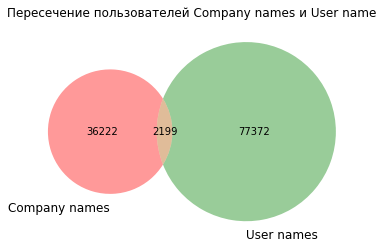

In [41]:
# v1 новое  надеюсь я все правильно сделала :D
# Демонстрируем пересечение данных по network_username
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
set1 = set(ppl_df_copy['network_username'])
set2 = set(comp_df_copy['network_username'])
# Строим диаграмму Венна
venn2([set1, set2], set_labels=('Company names', 'User names'))

# Отображаем график
plt.title("Пересечение пользователей Company names и User name")
plt.show()   

На диаграмме можно увидеть, что между данными в датасетах company_and_rounds и people есть некоторые совпадния, однако их недостаточно, чтобы объединить датасеты. Это подтверждает, что столбцы хранят различную информацию.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Да тут главное подчеркнуть разный контекст.  Скорее всего даже эти пересечения случайные совпадение. 


 


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

<font color='#8B0000'>Комментрарий студента: Не очень поняла задачу, в датасете действительно много пропусков, в некоторых столбцах с информацией о раундах 75% пропусков и для анализа вроде бы они не нужны, тем более по такому количесву данных не получится сжелдать полноценный анализ. Можно ли вообще эти столбцы убрать, если задача - максимально сохранить данные?</font>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Давай проанализируем задание:
    
    
    Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.
    
    
- Это значит одна компания должна занимать одну строчку. Давай посмотрим первые три строчки, у тебя их занимает компания Wetpaint, а что мешает схлопнуть её в одну? Правильно, потому что некоторые столбцы содержат разную информацию по этой компании, например raised_amount, поэтому просто схлопнуть с помощью drop_duplicated не получится     
    
    
    
    Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

    
    
- Тут имеется в виду сохранить информацию обо всех компаниях.  Поэтому в итоге мы должны   получить датасет с около 196 строк (примерно столько у нас уникальных id_copmany) 
    
  
    
    
<div class="alert alert-warning">
 


Совет:

    
Есть два решения    
    
    
    
- Можно заняться агрегированием и схлопнуть три разные строчки  у Wetpaint (Первый три точки срочки в исходном датасете занимает эта компания) в raised_amount в одну, по какому то агрегатору (sum, count, first, unique, min...).   Но для этого нужно разобраться что такое raised_amount. Так по каждому столбцу который не позволяет нам схлопнуть 3 строчки Wetpaint в одну. А может там вообще не нужен столбец  raised_amount?...И тут мы подходим ко второму решению  
    

- Но самом деле есть вариант проще, и в проекте у нас есть прямые подсказки на это решение (можешь их найти самостоятельно, их примерно 5 - 6). 

Эти подсказки указывают что company_rounds была получена в результате объединения двух меньших табличек.  До этого мы из двух и более табличек делали одну, а тут попробуем сделать наоборот. В одной  соберём информацию о компании, в другой о раундах (с учетом столбцов которые нам понадобятся ниже). А так как столбцов в табличках у нас станет меньше, то эта операция позволит   сократить количество строк, убрав полные дубликаты. И вот у нас готовые таблички для дальнейшего анализа - табличка размером в примерно 200К строк, где каждая строка это 1 компания, а столбцы содержат только нужныю информацию. Дальше мы сможем по company_id добавлять к этой табличке информацию из других тибличек. Видишь как будет удобно 
    
    
    
    


--------------

In [42]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   acquiring_company_id  217472 non-null  float64       
 1   name                  217472 non-null  object        
 2   category_code         143886 non-null  object        
 3   status                217472 non-null  object        
 4   founded_at            109956 non-null  datetime64[ns]
 5   closed_at             3449 non-null    datetime64[ns]
 6   domain                147159 non-null  object        
 7   network_username      95534 non-null   object        
 8   country_code          108607 non-null  object        
 9   investment_rounds     217472 non-null  float64       
 10  funding_rounds        217472 non-null  float64       
 11  funding_total         217472 non-null  float64       
 12  milestones            217472 non-null  float64       
 13 

In [43]:
#v2 скорректировано
#Разделяем датасет company
company_df = comp_df.iloc[:, [0, 1, 2, 3, 4, 5, 8, 9, 10, 11]]
company_df.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0


In [44]:
# v3 Убираем дубликаты
company_df = company_df.drop_duplicates()
company_df = company_df.dropna(subset=['acquiring_company_id'])
company_df

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,NaN,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
217462,183352.0,Mattress Source,NaN,operating,NaT,NaT,NaN,0.0,0.0,0.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,USA,0.0,4.0,44000000.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,USA,0.0,1.0,1300000.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,NaN,0.0,0.0,0.0


In [45]:
#rounds_df = comp_df.iloc[:, [0, 1, 3, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
#rounds_df = rounds_df.dropna(subset=['acquiring_company_id'])
#rounds_df.head(15)

<font color='#8B0000'>v2 Скорректировано</font>
Было принято решение разделить датасет и вывести отдельную таблицу company, которавя содержит информацию о компаниях и столбцы, необходимые для дальнейшего анализа.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:

Только надо было дубликату убрать, посмотри на первые три строчки, там данные полностью повторяются
 

<font color='#8B0000'>v3 Комментарий студента: да, я это заметила, но решила их удалить ниже, так как после присоединения еще одной таблицы дубликаты остаются, мне показалось лоичнее убрать все сразу.</font>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Совет 🤔:


 Видел.  Иначе бы тут поставил красный.   Понял твою логику

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Виктория, у тебя старательно выполненная работа, всё чётко, осмысленно. Выводы присутствуют, они чёткие и подробные, графики оформлены аккуратно  

    
Нет проблем с комментированием кода, тем, кто будет работать с твоим кодом, будет понятен ход твоих мыслей и логика  

Хорошая работа с данными, поддерживаю, что не стала использовать заглушку/заполнение данных там, где не нужно  

Использовала оптимальные методы  
 
Помнишь о стилистике, не допустила появление двух одинаковых названий столбцов  
 
    
Я оставил небольшие советы и вопросы (если есть время и желание, можешь воспользоваться/ответить) 
    
    
**Обязательное к исправлению**:  

    
    
     
- В случае сильных выбросов в раундах не стоит использовать **среднюю**, и тут нам прямо подсказывается найти "типичное значение", а это **медиана**  

    
    
    
- Ошибка исполнения кода 

    
    
- Нет обоснования и контроля, насколько удачными оказались выбранные bins  
 
    
    
- Для объединения данных используем merge    
     
    
    
- Правильно что обратила внимание на разные контекст, но попробуй на цифрах это показать
 
    
    
- В последнем разделе предлагаю сделать операцию, обратную объединению, — разбить одну таблицу на две, затем взять одну и, убрав полные дубликаты, получить удобную таблицу, где каждая компания будет занимать только одну строку (как нас и просят в задании). Вот с ней и будем работать  

    
 
    
Исправляем ошибки, и можешь приступать к исследовательскому анализу  

<div class="alert alert-warning">

Совет 🤔:

    
    
И так как многие студенты ошибаются в трактовке (и пишут анализ не по тому датасету), сразу хочу указать для 1 пункта во второй части на подсказку в брифе: результатом "Объединение данных" должна быть таблица с 40.000 примеров (``funding_rounds`` > 0 ИЛИ ``investment_rounds`` > 0 ИЛИ ``status`` == acquired)  

    
    
А также обрати внимание в брифе: "Далее работайте только с этими данными".  

    
Это как раз об этом сорокатысячнике. Пишу, чтобы не оказалось, что будут сделаны выводы совсем по другому датасету


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>

<font color='#8B0000'>Комментрарий студента: проверять</font>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

----------

In [46]:
# v2 Скорректировано
# Фильтруем компании в таблице rounds по критериям
#rounds_df = rounds_df[(rounds_df['funding_rounds'] > 0)  | (rounds_df['investment_rounds'] > 0) | (rounds_df['status'] == 'acquired')]
# Фильтруем таблицу company по критериям
#company_df = company_df[company_df['acquiring_company_id'].isin(rounds_df['acquiring_company_id'])]
company_df1 = company_df[(company_df['funding_rounds'] > 0)  | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
# Фильтруем таблицу company по критериям
acq_df_copy = acq_df.iloc[:, [2, 4]]
companies_merged = company_df1.merge(acq_df_copy, left_on='acquiring_company_id', right_on='acquired_company_id', how='left')
companies_merged = companies_merged.drop('acquired_company_id', axis=1)


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 



- Усложнила ты объединение.  rounds_df нам не подходит, в нём содержится дубликаты компаний. Датасет который нам подходит это company_df, только в нём не хватает необходимых столбцов.  Предлагаю включить в него все cтолбцы до milestounes (Посмотри первые три строчки исходного датасета, видно же что до milestounes все данные повторяются). Вот собственно и всё что нужно было сделать

    
- Объединение проведено правильно (acquired_company_id) Но посоветую сделать проверку на дубликаты по company_id, и дать объяснение откуда они   могли взяться,  и решить удалять нам их или нет
 

In [47]:
companies_merged.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39750000.0,NaN
1,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0,20000000.0
2,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.0,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,USA,0.0,1.0,5000000.0,47500000.0
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,USA,0.0,1.0,0.0,0.0


In [48]:
# Проверяем на дубликаты
companies_merged.duplicated().sum()

87

<font color='#8B0000'>v2 Новый комментарий</font>
После фильтрации и объединения итоговой таблицы все еще сохраняются дубликаты - это может быть связано с тем, что в датасете company_and_rounds хранилась информация о нескольких раундах фианасирования одной компании. Так как в итоговой таблице есть столбец funding_rounds, хранящий информацию о количестве раундов, дубликаты можно удалить.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


Это дубликаты у тебя потому что ты не убрала их на конце первой части проекта (И там дубликаты возникли потому что были объединены две маленькие таблицы в comp_df). И там ещё после обьединения с    acq_df_copy возникает дубликаты, потому что одна и та же компания   продавалась несколько раз

In [49]:
# Удаляем дубликаты
companies_merged = companies_merged.drop_duplicates()

In [50]:
companies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40803 entries, 0 to 40889
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acquiring_company_id  40803 non-null  float64       
 1   name                  40803 non-null  object        
 2   category_code         35365 non-null  object        
 3   status                40803 non-null  object        
 4   founded_at            27853 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   country_code          34792 non-null  object        
 7   investment_rounds     40803 non-null  float64       
 8   funding_rounds        40803 non-null  float64       
 9   funding_total         40803 non-null  float64       
 10  price_amount          9303 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 3.7+ MB


In [51]:
# Именим значения в столбцах funding_total и price_amount на млн
companies_merged['funding_total'] = companies_merged['funding_total'] / 1000000
companies_merged['price_amount'] = companies_merged['price_amount'] / 1000000
companies_merged.head()

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,USA,0.0,3.0,39.75,NaN
1,10.0,Flektor,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.00,20.0
2,100.0,There,games_video,acquired,NaT,NaT,USA,0.0,0.0,0.00,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,USA,0.0,1.0,5.00,47.5
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,USA,0.0,1.0,0.00,0.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

---------

<font color='#8B0000'>Комментрарий студента: Я не понимаю первый пункт задачи. Я попыталась посторить гистограмму, но получилось что-то странное:</font>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 
 


    
Нас просят графическим способом уточнить информацию о типичных и выбросах. Поэтому стоило основной упор сделать на работу с графиками. Графики не получаются интересами потому что у нас очень сильные выбросы, поэтому тут надо их "позумить", но графическими способами а не просто ограничением шкалы
    
    

-- Можно было   построить  boxplot и еще один boxplot, отключив демонстрацию выбросов (showfliers=False у seaborn),  так будет лучше графически видны медиана и квантили   
    
    
-- Для определения зоны   начала выбросов, можно использовать гистограмму. Если данные имеют большой разброс, есть вариант добавить логарифмическую шкалу для гистограммы.  С логарифмической шкалой все значения (малые и большие) будут равномерно распределены на графике, что облегчит анализ, мы увидим данные которые могут быть скрыты из-за сильного перекоса,  и выбросы будут визуально лучше отделены от основной массы данных    
    
 
    # код ревьюера
    (схема)    
    plt.figure(figsize=(10, 6))
    plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
    plt.xscale('log')  # Логарифмическая шкала по оси X
    plt.xlabel('Общее финансирование (логарифмическая шкала)')
    plt.ylabel('Количество компаний')
    plt.title('Распределение общего финансирования (логарифмическая шкала)')
    plt.show()


В идеале, распределение должно быть относительно гладким. Резкие обрывы или скачки в высоте столбиков гистограммы могут указывать на начало зоны выбросов. Например, если высота столбиков постепенно уменьшается, а потом внезапно падает до нуля или очень маленького значения, это может быть границей
 

<AxesSubplot:ylabel='funding_total'>

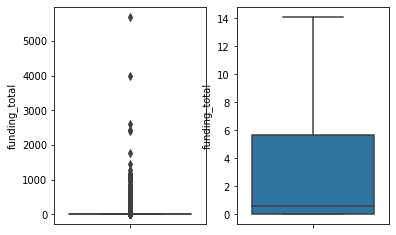

In [52]:
# v2 новое
# Создаем boxplot с выбросами и без
f, axes = plt.subplots(1, 2)

sns.boxplot(y='funding_total', data=companies_merged,  orient='v' , ax=axes[0])
sns.boxplot(y='funding_total', data=companies_merged,  orient='v' , ax=axes[1], showfliers=False)

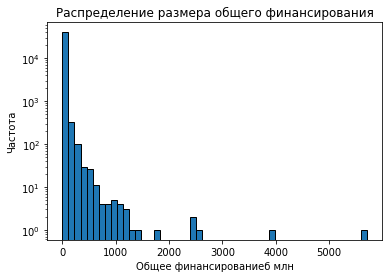

In [53]:
# Строим гистограмму v2 скорректировано
companies_merged.hist('funding_total',
                bins=50,
                edgecolor='black',
                log=True)

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Общее финансированиеб млн')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

v2
На графиках можно увидеть, что в столбце funding_total довольно много экстремальных выбросов.

In [54]:
# v2 Скорректировано: используем метод describe
companies_merged.describe().round(2)

,acquiring_company_id,investment_rounds,funding_rounds,funding_total,price_amount
count,40803.00,40803.00,40803.00,40803.00,9303.00
mean,110431.91,0.15,1.29,10.14,397.31
std,90393.76,3.12,1.26,56.44,26971.45
min,1.00,0.00,0.00,0.00,0.00
25%,33712.00,0.00,1.00,0.00,0.00
50%,69479.00,0.00,1.00,0.60,0.00
75%,184657.50,0.00,2.00,5.65,0.08
max,286215.00,478.00,15.00,5700.00,2600000.00


<font color='#8B0000'>Комментарий студента: Помоги, пожалуйста. Выше я столбцы funding_total и price_amount разделила на 1 000 000, чтобы не отображался такой результат с e+**, но в price_amount почему то не изменилось отображение.</font>

<font color='#8B0000'>Комментарий студента v2: Спасибо!</font>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


Пожалуйста. Виктория оформляй пожалуйста однообразно свои комментарии.  Тут у тебя Комментарий студента v2, а выше !v2


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 

Как вариант добавь .round(2)

После использования метода describe, который помогает увидеть основные показатели, можно сделать следующие выводы:
- данные содержат довольно много нулевых значений, поэтому большинство показателей находятся около нуля: 75% данных в столбце investment_rounds, 25% в столбце funding_total, 50% в столбце price_amount
- можно говорить о высоких выбросах в столбцах investment_rounds и funding_total:
    - в столбце investment_rounds 75 процентиль равняется 0, в то время как максимальное значение - 478
    - в столбце funding_rounds 75 процентиль составляет почти 6 млн, а максимальное значени е достигает 5700 млн
    - (v2) в столбцах наблюдается большая разница между сердним и медианным занчениями

Если отфильтровать в таблице нулевые данные и экстремальные выбросы, можно увидеть немного другую картину:

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Ещё можно увидеть огромную разницу между   средней и медианой

In [55]:
# Фильтр по investment_rounds
outliers1 = companies_merged['investment_rounds'].quantile(0.99)
f1 = companies_merged[(companies_merged['investment_rounds'] > 0) & (companies_merged['investment_rounds'] < outliers1)]

# Фильтр по funding_total
outliers2 = companies_merged['funding_total'].quantile(0.99)
f2 = companies_merged[(companies_merged['funding_total'] > 0) & (companies_merged['funding_total'] < outliers2)]

# Фильтр по price_amount
f3 = companies_merged[companies_merged['price_amount'] > 0]
display(f1['investment_rounds'].describe())
display(f2['funding_total'].describe())
display(f3['price_amount'].describe().round(2))

count    1963.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: investment_rounds, dtype: float64

count    27483.000000
mean        10.101373
std         18.627799
min          0.000291
25%          0.500000
50%          2.500000
75%         10.150000
max        133.663000
Name: funding_total, dtype: float64

count       2470.00
mean        1496.44
std        52336.12
min            0.00
25%           12.72
50%           56.20
75%          264.50
max      2600000.00
Name: price_amount, dtype: float64

<Figure size 504x216 with 0 Axes>

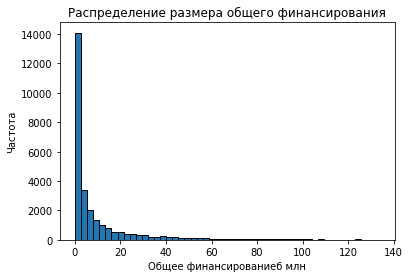

In [56]:
# Фильтруем выброс и нули
f_companies_merged = companies_merged[(companies_merged['funding_total'] < outliers2) & (companies_merged['funding_total'] > 0)]
plt.figure(figsize=(7, 3))

# Строим гистограмму
f_companies_merged.hist('funding_total',
                bins=50,
                edgecolor='black')

# Настраиваем оформление графика
plt.title('Распределение размера общего финансирования')
plt.xlabel('Общее финансированиеб млн')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Без учета нулевых занчений и экстремальных выбросов можно увидеть, что типичный размер общего финансирования для компаний не превышает 2 млн.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

------------

In [57]:
# Фильтруем компании, купленные за 0-1 доллар с ненулевым объемом финансирования
filtered_companies = companies_merged[(companies_merged['price_amount'] <= 0.000001) & companies_merged['funding_total'] > 0]
filtered_companies

,acquiring_company_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,funding_rounds,funding_total,price_amount
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,USA,0.0,7.0,121.50000,0.0
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,USA,0.0,3.0,4.00000,0.0
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,USA,0.0,1.0,0.25000,0.0
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,USA,0.0,3.0,1.31000,0.0
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,USA,0.0,2.0,44.92500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
40834,99.0,Amie Street,web,acquired,2011-07-04,NaT,USA,0.0,2.0,3.90000,0.0
40836,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,USA,0.0,2.0,5.17235,0.0
40840,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,USA,0.0,1.0,10.00000,0.0
40854,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,USA,0.0,1.0,14.50000,0.0


<AxesSubplot:>

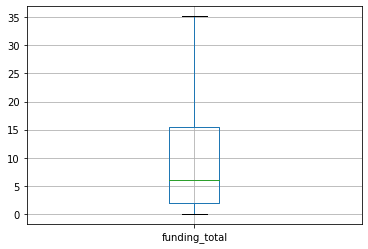

In [58]:
# Графическое представление разброса данных без выбросов
# (не очень понимаю, как показать с выбросами, т.к. отображение самого ящика очень сильно сжимается)
filtered_companies.boxplot(column='funding_total', showfliers=False)

In [59]:
# Рассчитываем границы выбросов
q1 = filtered_companies['funding_total'].quantile(0.25)
q3 = filtered_companies['funding_total'].quantile(0.75)
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
#v2 скорееткировано
lower = max(0, lower)
new_df = filtered_companies[filtered_companies['funding_total'] < upper]
upper_perc = round(new_df['funding_total'].count() / filtered_companies['funding_total'].count() * 100, 2)
print(f'Верхняя граница выбросов для столбца "funding_total": {upper} млн, что соответствует {upper_perc} процентилю.')
print(f'Нижняя граница выбросов для столбца "funding_total": {lower} млн.')

Верхняя граница выбросов для столбца "funding_total": 35.5 млн, что соответствует 91.02 процентилю.
Нижняя граница выбросов для столбца "funding_total": 0 млн.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



👍


 

  
 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



Отлично (Процентиль подсчитан верно), но есть   замечание      нижняя граница выбросов не может принимать отрицательное число для funding_total данных, а ты пишешь
    
    
    Нижняя граница выбросов для столбца "funding_total": -18.25 млн, что составляет ниже возможного значения для данного столбца.
    
    
Предлагаю решить задачу аналитически, решив на какое возможное число нам заменить. Математика абстрактная наука, а мы мы должны сопоставить полученную цифру с реальностью 

    
<div class="alert alert-warning">


Совет 🤔:


И лучше это сразу прописать 
    
    
    lower_bound = max(Какое-то число, lower_bound)
    
, для универсальности     


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

-------------

In [60]:
#v2 Отфильтровано v3 исправлено
# Вычисляем типичные цены и разброс, сортируем и выводим топ
outliers_ft = companies_merged['price_amount'].quantile(0.90)
categoires_gr = companies_merged[(companies_merged['price_amount'] > 0) & (companies_merged['price_amount'] < outliers_ft)]
categoires_gr = categoires_gr.groupby('category_code')['price_amount'].agg(['median','min', 'max', 'count'])
categoires_gr['price_dif'] = categoires_gr['max'] - categoires_gr['min']
categoires_gr = categoires_gr[categoires_gr['count'] > 50]
categoires_gr = categoires_gr.drop(['min', 'max', 'count'], axis=1)
categoires_gr = categoires_gr.sort_values(by=['median', 'price_dif'], ascending=False)
categoires_gr.head()

,median,price_dif
category_code,,
biotech,27.95,114.891000
advertising,27.70,118.990000
games_video,26.30,111.999940
mobile,26.20,104.995000
software,25.00,111.998142


<font color='#8B0000'>v3 Скорректировано</font>
Были выделены топ-5 категорий стартапов с наиболее типично высоким ценами и наибольшим разбросом цен. Типичные цены были рассчитаны по медиане, чтобы наличие экстремальных выбросов не влияло на усредненное значение. Разброс цен был hассчитан путем вычитания максимальных и минимальных значений. Данные отражены по категориям, которых есть 50 и более компаний для более достоверной статистики.

<font color='#8B0000'>Комментарий студента:Будет ли правильнее для расчета разброса отфильтровтаь выбросы?</font>

 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:


    
    
    Комментарий студента:Будет ли правильнее для расчета разброса отфильтровтаь выбросы?
     
    
    
- Ты использовала медианы поэтому по сути с выбросами разобралась (Только я бы предложил убрать нулевые цены,  а то из-за этого медиана будет не очень информативной). Но для оценки размаха ты используешь разницу между максимальным и минимальным значением, но максимальное значения может оказаться единичным очень сильный выбросом,   лучше подстраховаться и взять цены ниже   90-о квантиля (Кроме того в данных существует явно нереальные цифры в 2,4 трлн долларов. Можно   погуглить и найти какая реальная цена продажи)
    
    
    
    
    
    
<div class="alert alert-warning">
 


Совет 🤔:

    
- для наглядности посоветовал бы построить график scatter где в разбивке по категориям по одной оси показатель типичной цены,  по другой разброс показатель разброса цен, а еще можно размером кружочка указать сколько стартапов в кто	 или иной категории (Это можно задать с помощью аргумента s)

 
    
- Ещё я бы обратил внимание на количество,  ведь если данные о какой-то категории мы черпаем из считанного количества стартапов, то мы тем самым подмываем солидность нашего анализа (Помнишь когда мы анализировали раунды то брали для анализа только года где число раунов больше 50, почему по твоему мы так делали?). 
В частности в nanotech попал всего один пример, тут нет никакой статистики   
       
 

<font color='#8B0000'> v2 Комментарий студента: Что-то у меня не получилось scatter корректно построить, видимо не поняла, какими данными оперриовать.</font>

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:


scatter это дополнительно (по идее на одной оси нужно указать медиану, а по другой разброс). А вот кое-что надо обязательно исправить,  видимо я пропустила твою ошибку на прошлой итерации  
    
Ведь в данном случае идёт о price_amount  - цене за которой   была совершена покупка. А ты используешь  funding_total (Сумма инвестиций в компанию)
       
     

 

<font color='#8B0000'> v3 Комментарий студента: да, я тут засомневалась, так как в столбце price_amount намного меньше непустых данных, исправила.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Успех 👍:



👍

(Почитал свои комментарий выше и ужаснулся, там непонятно что написано было.  Подправил)
 

In [61]:
# для комментария
companies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40803 entries, 0 to 40889
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acquiring_company_id  40803 non-null  float64       
 1   name                  40803 non-null  object        
 2   category_code         35365 non-null  object        
 3   status                40803 non-null  object        
 4   founded_at            27853 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   country_code          34792 non-null  object        
 7   investment_rounds     40803 non-null  float64       
 8   funding_rounds        40803 non-null  float64       
 9   funding_total         40803 non-null  float64       
 10  price_amount          9303 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 3.7+ MB



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

----------

In [62]:
# Вычисляем типичное значение количества раундов
status_gr = companies_merged.groupby('status')['funding_rounds'].median()
status_gr.sort_values()

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64

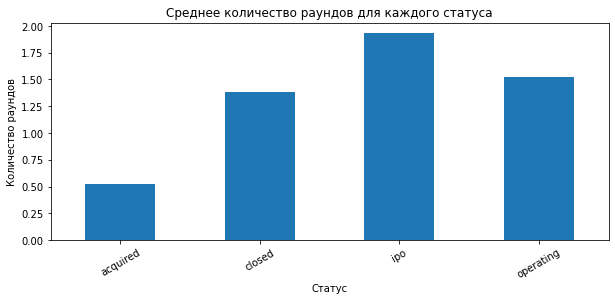

In [63]:
# Создаём контейнер графика и задаём размер !Скорректировано v1!
plt.figure(figsize=(10, 4))

#Создаем сгруппированный df со средними значениями
status_gr1 = companies_merged.groupby('status')['funding_rounds'].mean()
status_gr1.sort_values()

# Строим столбчатую диаграмму
status_gr1.plot(
               kind='bar',
               rot=30,
               legend=False,
               title=f'Среднее количество раундов для каждого статуса'
)

# Настраиваем оформление графика
plt.xlabel('Статус')
plt.ylabel('Количество раундов')
# Выводим график
plt.show()

Типичное количество раундов для каждого статуса стартапа, кроме статуса `acquired` - 1. Для стартапов со статусом `acquired` это значение ниже. По графику можно увидеть, что для данного статуса среднее кличество раундов ~ 0,5, в то время как для статуса `ipo` это значение близко к 2.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



логичный результат


 


<div class="alert alert-warning">
 


Совет 🤔:


 
- Можно ещё построить  график, который иллюстрирует кумулятивную вероятность приобретения стартапа в зависимости от количества проведенных раундов финансирования. Анализ такого графика поможет   понять, как количество раундов финансирования связано с вероятностью того, что стартап будет приобретен. Например, если вероятность резко возрастает после 1-2 раундов, это может указывать, что большинство успешных стартапов покупаются на ранних стадиях

<font color='#8B0000'> v2 Комментарий студента: Как гуманитарий по образованию, мне не слишком понятно как такой график построить, но я буду разбираться</font>


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

---------

В ходе исследования был проанализирован большой массив данных о финансировании стартапов, в котром содрежались данные о компаниях, и сотрудниках, образовании сотрудлников, а также информация о покупках компании и раундах финансирования. Акцент исследования был сделан на том, чтобы проанализировать имеющийся массив данных на наличие достаточной информации для дальнешего анализа и выявления признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.

Довольно большая часть исследования была отведена на анализ предоставленных данных и их обработку. В ходе выполнения проекта были проведены следующие действия и сделаны соответствующие выводы:
- после знакомства с данными были замечены некоторые ошибки - схожие названия столбцов, некорректное название столбцов, неподходящие типы данных - данные были исправлены для удобства дальнейшей работы с ними
- в датасетах было обнаружено большое количество пропусков, в частности в датасете company and rounds пропуски в некоторых столбцах достигали 75%

В ходе предварительного исследования были сделаны следующие выводы по поставленным вопросам:
- Максимальный типичный размер собранных в рамках одного раунда средств был зафиксирован в 2005 году - более 5 млн. рублей. В 2013 году было зафиксировано максимальное количество раундов за весь период - 11072, при этом типичный размер средств принимает довольно низкие значения относительно других лет.
- После объединения датасетов people.csv и education.csv было замечено, что примерно для половины сотрудников данные об образовании отсутствуют. К данным датасетам есть возможность присоединить датасет degrees.csv, так как во всех датасетах есть столбец с идентификатором сотрудника, однако для этого необходима дополнительная обработка датасета.
- После распреденления компаний на несколько групп по количеству сотрудников выявлено, что как минимум 20% информации об образовании сотрудников отсутствует во всех категориях, при этом доля сотрудников без информации об образовании в компаниях с одним сотрудником гораздо выше - 59%.
- Столбец network_username, который содержится в нескольких таблицах не является подходящим для объединения данных, так как в каждом датасете столбец с данным названием хранит различную информацию

По итогу исследования датасета company and rounds было предположено, что некоторые столбцы с большим количеством появились в датасете позднее, и эти данные изначально были неизвестны или не зафиксированы. Вследствие, было приято решение разделить данный датасет на два, в одном из которых оставлена информация о компаниях, в другом - информация о раундах.
Полученные таблицы были дополнительно обработаны, а к таблице с информацией о компаниях были добавлены столбцы, необходимые для дальнейшего проведения исследования. 

В ходе исследования получившейся итоговой таблицы были сделалны следующе выводы:
- данные содержат довольно много нулевых значений, поэтому большинство показателей находятся около нуля: 75% данных в столбце investment_rounds, 25% в столбце funding_total, 50% в столбце price_amount
- можно говорить о высоких выбросах в столбцах investment_rounds и funding_total:
    - в столбце investment_rounds 75 процентиль равняется 0, в то время как максимальное значение - 478
    - в столбце funding_rounds 75 процентиль составляет почти 6 млн, а максимальное значение достигает 5700 млн
- в таблице есть данные о примерно 1500 компаний, которые были куплены за 0 или 1 доллар, при этом общий размер финансирования для них был ненулевым
- среди компаний были выделены топ-5 категорий с высокими ценами и наибольшим разбросом цен за стартап - ими стали компании следующих сфер: биотехнологии, реклама, видеоигры, мобильные бехнологии и программное обеспечение.  
- типичное количество раундов для каждого статуса стартапа, кроме статуса acquired - 1. Для стартапов со статусом acquired это значение ниже. По графику можно увидеть, что для данного статуса среднее кличество раундов ~ 0,5, в то время как для статуса ipo это значение близко к 2.

При анализе результатов исследования стоит иметь ввиду, что в данных содержится довольно большое количество пропусков и нулей, а также экстремально высоких выбросов, поэтому была высока вероятность искажения результатов.

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу Виктория!    
 
    
    
    
**Что осталось доработать**:  
          
    
    
- Предлагаю убрать строчку где ту тебя нижняя граница отрицательное число. Ведь это выглядит странно    
    
    
- Для оценки размаха не стоит использовать разницу между минимальной и максимальной ценой, ведь это могут быть выбросы (можно использовать **квантиль** ) 
    
    
Жду исправления ошибок для принятия проекта   

<font color='#8B0000'> v2 Комментарий студента: Марат, спасибо большое за обратную связь, советы и объяснения!</font>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу Виктория!    
 

Что осталось из красного:

  
- Осталось использовать   price_amount в разделе   ``Цены стартапов по категориям``, и проект можно принимать


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>

Спасибо за работу!    

  
Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Виктория. Желаю успехов в дальнейшей учебе!
 